(307511, 122)
106
Numbers of remain columns: 73
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


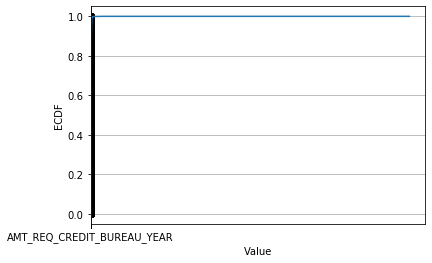

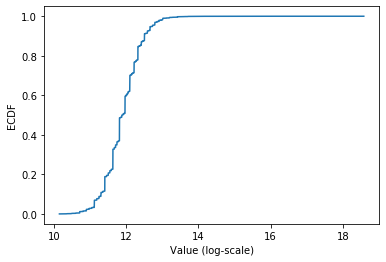

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


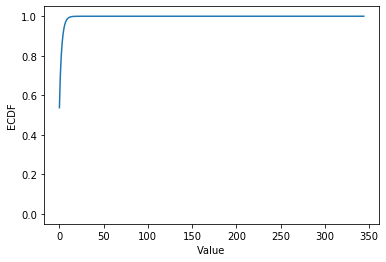

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
26.0          1
27.0          5
28.0          1
29.0          2
30.0          1
47.0          1
344.0         1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


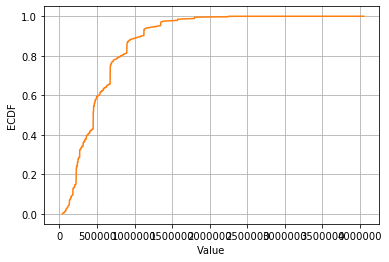

4050000.0       8
3825000.0       1
3712500.0       1
3600000.0       3
3555000.0       1
             ... 
54000.0       290
50751.0         1
49500.0       157
45000.0      1169
40500.0         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

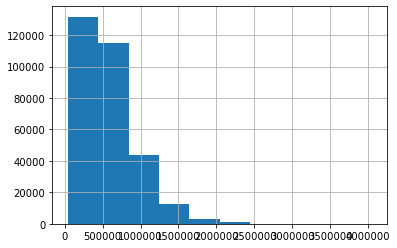

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\QQ\Desktop\application_train-d9.csv")
df.head()
print(df.shape)
#選擇數值型欄位
#isin()接受一個列表，判斷該列中元素是否在列表中
# print(df["AMT_INCOME_TOTAL"].dtypes)-->float64
dtype_select = ["int64","float64"]
numeric_columns = list(df.columns[list(df.dtypes.apply(str).isin(dtype_select))])
print(len(numeric_columns))

#再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(df[numeric_columns].columns[list(df[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns: %i" % len(numeric_columns))
#畫箱型圖檢視這些欄位的數值範圍
for col in numeric_columns:
    df.boxplot(col)
#     plt.show()

# 從上面的圖檢查的結果，至少這三個欄位好像有異常值
# AMT_INCOME_TOTAL
# OBS_60_CNT_SOCIAL_CIRCLE
# REGION_POPULATION_RELATIVE

# AMT_CREDIT
# AMT_ANNUITY
# AMT_GOODS_PRICE
# APARTMENTS_AVG
# BASEMENTAREA_AVG
# CNT_CHILDREN
# CNT_FAM_MEMBERS
# HOUR_APPR_PROCESS_START
# OWN_CAR_AGE


# 最大值離平均與中位數很遠
print(df["AMT_INCOME_TOTAL"].describe())

# 1.繪製ECDF
cdf = df["AMT_INCOME_TOTAL"].value_counts().sort_index().cumsum()#注意寫法!
#cumsum:按軸求和 sort_index():默認是按照索引進行正序排列 value_counts()函数可以对Series里面的每个值进行计数并且排序
# index用法:
# aList = [123, 'xyz', 'runoob', 'abc']
# print "xyz 索引位置: ", aList.index( 'xyz' )
# print "runoob 索引位置 : ", aList.index( 'runoob', 1, 3 )
plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
# plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()#一定要畫出來不然下一個圖會錯誤!!

plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

#2.繪製ECDF
print(df["OBS_60_CNT_SOCIAL_CIRCLE"].describe())
cdf=df["OBS_60_CNT_SOCIAL_CIRCLE"].value_counts().sort_index().cumsum()
plt.plot(list(cdf.index),cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05])
plt.show()
df['OBS_60_CNT_SOCIAL_CIRCLE'].hist()#一條代表右邊有值但是數量稀少#用value_counts找右邊的值!!
print(df['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = True))
#ascending这个参数的默认值是True，按照升序排序，当传入False时，按照降序进行排列

#3.繪製ECDF
print(df["AMT_GOODS_PRICE"].describe())
cdf=df["AMT_GOODS_PRICE"].value_counts().sort_index().cumsum()
plt.plot(list(cdf.index),cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05])
plt.show()
df['AMT_GOODS_PRICE'].hist()#一條代表右邊有值但是數量稀少#用value_counts找右邊的值!!
df['AMT_GOODS_PRICE'].value_counts().sort_index(ascending = False)




